<h1>
    Telecom Churn Case Study
</h1>

<h2>
    Problem Statement
</h2>

<h3>
    Business Problem Overview
</h3>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
    
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, <strong>customer retention</strong> has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to <strong>predict which customers are at high risk of churn.</strong>

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

<h4>
   Business Goal:
</h4>

Retaining high profitable customers is the number one business goal.

<h2>Analysis</h2>
    <h3>Understanding Data</h3>

In [520]:
# Importing necessary libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [521]:
# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [522]:
# Reading datasest into DataFrame.
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [523]:
# Checking information about data.

print("Shape of DataFrame =",df.shape,"\n")

print(df.info())

def metadata_matrix(df) : 
    return pd.DataFrame({
                    'Datatype' : df.dtypes.astype(str), 
                    'Non_Null_Count': df.count(axis = 0).astype(int), 
                    'Null_Count': df.isnull().sum().astype(int), 
                    'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2),
                    'Unique_Values_Count': df.nunique().astype(int) 
            }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(df)

Shape of DataFrame = (99999, 226) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


<h3>Data Cleaning</h3>

In [524]:
# From above table it is clear that number of rows is same as distinct mobile numbers.
# So we can say there is no duplicate data

df['mobile_number'].value_counts().sum()==df['mobile_number'].nunique()

True

In [525]:
# As we can see Mobile_number is unique identifier. We can set mobile_number as index. Lets do it.

df = df.set_index('mobile_number')

In [526]:
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,N

In [527]:
# Some column name start with month name. lets rename.

df = df.rename({
        'sep_vbc_3g' : 'vbc_3g_9',
        'aug_vbc_3g' : 'vbc_3g_8',
        'jul_vbc_3g' : 'vbc_3g_7',
        'jun_vbc_3g' : 'vbc_3g_6'
},axis=1)

## Handling Missing Values

### Handling missing values in columns.

In [528]:
# Checking the missing value(Null_Percentage) in column.

df_missing_columns = metadata_matrix(df).sort_values(by='Null_Percentage', ascending=False)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
count_rech_2g_6,float64,25153,74846,74.85,31
arpu_2g_6,float64,25153,74846,74.85,6990
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_3g_6,float64,25153,74846,74.85,25
av_rech_amt_data_6,float64,25153,74846,74.85,887
max_rech_data_6,float64,25153,74846,74.85,48
night_pck_user_6,float64,25153,74846,74.85,2
fb_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37


In [529]:
# Lets make a list of columns having more than 50% missing values.

columns_missing_50 = list(df_missing_columns.index[df_missing_columns['Null_Percentage'] > 50])

In [530]:
# Now, Delete the columns having more than 50% missing values.

df = df.drop(columns_missing_50, axis=1)


In [531]:
df.shape

(99999, 185)

In [532]:
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_mou_9,float64,92254,7745,7.75,26553
onnet_mou_9,float64,92254,7745,7.75,23565
loc_og_mou_9,float64,92254,7745,7.75,25376
spl_og_mou_9,float64,92254,7745,7.75,4095
std_ic_t2t_mou_9,float64,92254,7745,7.75,6157
roam_og_mou_9,float64,92254,7745,7.75,5882
std_og_t2t_mou_9,float64,92254,7745,7.75,17934
std_ic_mou_9,float64,92254,7745,7.75,11266
roam_ic_mou_9,float64,92254,7745,7.75,4827
std_ic_t2m_mou_9,float64,92254,7745,7.75,8933


Date columns are not required in our analysis. So, Delete date columns.

In [533]:
# Lets make a list having dates in it. 

df_date_columns = [x for x in df.columns.to_list() if 'date' in x]
print(df_date_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [534]:
# Dropping date columns.
df = df.drop(df_date_columns, axis=1)

In [535]:
df.shape

(99999, 177)

Dropping circle_id column as this column has only one unique value. 
Hence there will be no impact of circle_id column on the data analysis.

In [536]:
# Droping circle_id column.

df = df.drop('circle_id', axis=1)

In [537]:
df.shape

(99999, 176)

<h3>Filter High-Value Customers</h3>

Lets create a column of average of total recharge amount of month 6 and 7 and finding out 70th percentile of the average recharge amount in the first two months.

In [538]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [539]:
# Filtering customer whos recharge is more than and equal to 368.5.

df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.

In [540]:
# Lets check the shape of DataFrame.

df.shape

(30011, 177)

We can see that we have around *~30K* rows after filtering

### Handling missing values in rows.


In [541]:
# Count the rows having more than 50% missing values

df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 177)

In [542]:
# Deleting the rows having more than 50% missing values

df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 177)

In [543]:
# Again checking missing value in column.

df_missing_columns = metadata_matrix(df)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_9,float64,28307,1590,5.32,18018
std_og_t2c_mou_9,float64,28307,1590,5.32,1
spl_og_mou_9,float64,28307,1590,5.32,2966
std_ic_t2f_mou_9,float64,28307,1590,5.32,1971
isd_og_mou_9,float64,28307,1590,5.32,908
loc_og_t2t_mou_9,float64,28307,1590,5.32,10360
std_og_mou_9,float64,28307,1590,5.32,15900
loc_og_t2m_mou_9,float64,28307,1590,5.32,15585
loc_og_t2f_mou_9,float64,28307,1590,5.32,3111
roam_ic_mou_9,float64,28307,1590,5.32,3370


From above data it is clear that missing value available in 9,8 ,7 and 6th month. For each month's revenue and usage data is not related to the other months. hence, missing value treatment could be performed month wise.

Lets start with
<h3>Handling 9th month missing values.</h3>
<p>
    <li>Note all the columns in above datafram with *_mou_9 month have exactly 5.32 Null_Percentage. Lets find out record and drop those records.</li>
</p>

In [544]:
# make a missing column list for 9 th month.

df_missing_column_list_9 =((df_missing_columns[df_missing_columns['Null_Percentage'] == 5.32]).index).to_list()
df_missing_column_list_9

['loc_ic_mou_9',
 'std_og_t2c_mou_9',
 'spl_og_mou_9',
 'std_ic_t2f_mou_9',
 'isd_og_mou_9',
 'loc_og_t2t_mou_9',
 'std_og_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'roam_ic_mou_9',
 'std_og_t2f_mou_9',
 'std_ic_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'std_og_t2m_mou_9',
 'loc_og_mou_9',
 'spl_ic_mou_9',
 'roam_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'ic_others_9',
 'loc_ic_t2f_mou_9',
 'isd_ic_mou_9',
 'loc_ic_t2m_mou_9',
 'onnet_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'offnet_mou_9']

In [545]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null

df_null_mou_9 = df[
        (df['loc_og_t2m_mou_9'].isnull()) &
        (df['loc_ic_mou_9'].isnull()) &
        (df['std_og_t2c_mou_9'].isnull()) &
        (df['spl_og_mou_9'].isnull()) &
        (df['std_ic_t2f_mou_9'].isnull()) &
        (df['isd_og_mou_9'].isnull()) &
        (df['loc_og_t2t_mou_9'].isnull()) &
        (df['std_og_mou_9'].isnull()) &
        (df['loc_og_t2m_mou_9'].isnull()) &
        (df['loc_og_t2f_mou_9'].isnull()) &
        (df['roam_ic_mou_9'].isnull()) &
        (df['std_og_t2f_mou_9'].isnull()) &
        (df['std_ic_mou_9'].isnull()) &
        (df['loc_og_t2c_mou_9'].isnull()) &
        (df['std_ic_t2o_mou_9'].isnull()) &
        (df['std_og_t2m_mou_9'].isnull()) &
        (df['loc_og_mou_9'].isnull()) &
        (df['spl_ic_mou_9'].isnull()) &
        (df['roam_og_mou_9'].isnull()) &
        (df['og_others_9'].isnull()) &
        (df['loc_ic_t2t_mou_9'].isnull()) &
        (df['ic_others_9'].isnull()) &
        (df['loc_ic_t2f_mou_9'].isnull()) &
        (df['isd_ic_mou_9'].isnull()) &
        (df['loc_ic_t2m_mou_9'].isnull()) &
        (df['onnet_mou_9'].isnull()) &
        (df['std_ic_t2t_mou_9'].isnull()) &
        (df['std_og_t2t_mou_9'].isnull()) &
        (df['std_ic_t2m_mou_9'].isnull()) &
        (df['offnet_mou_9'].isnull())
    ]

df_null_mou_9.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11

In [546]:
df_null_mou_9.shape

(1590, 177)

In [547]:
# Drop records for which MOU for Sep(9) are null.

df = df.drop(df_null_mou_9.index)

In [548]:
# Again checking missing value in column.

df_missing_columns = metadata_matrix(df)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_8,float64,28150,157,0.55,902
std_og_t2t_mou_8,float64,28150,157,0.55,11563
loc_og_t2t_mou_8,float64,28150,157,0.55,10706
std_ic_t2f_mou_8,float64,28150,157,0.55,1923
loc_og_t2m_mou_8,float64,28150,157,0.55,16002
loc_og_t2f_mou_8,float64,28150,157,0.55,3105
std_ic_t2m_mou_8,float64,28150,157,0.55,6362
loc_og_t2c_mou_8,float64,28150,157,0.55,1707
std_ic_t2t_mou_8,float64,28150,157,0.55,4441
loc_og_mou_8,float64,28150,157,0.55,18648


<h3>Handling 8th month missing values.</h3>
<p>
    <li>Note all the columns in above datafram with *_mou_8 month have exactly 0.55 Null_Percentage. Lets find out record and drop those records.</li>
</p>

In [549]:
# make a missing column list for 8th month.

df_missing_column_list_8 =((df_missing_columns[df_missing_columns['Null_Percentage'] == 0.55]).index).to_list()
df_missing_column_list_8

['isd_og_mou_8',
 'std_og_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_mou_8',
 'loc_ic_mou_8',
 'roam_og_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'loc_ic_t2t_mou_8',
 'og_others_8',
 'std_ic_t2o_mou_8',
 'spl_og_mou_8',
 'spl_ic_mou_8',
 'roam_ic_mou_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'isd_ic_mou_8',
 'std_ic_mou_8',
 'ic_others_8']

In [550]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null.

df_null_mou_8 = df[
        (df['isd_og_mou_8'].isnull()) &
        (df['std_og_t2t_mou_8'].isnull()) &
        (df['loc_og_t2t_mou_8'].isnull()) &
        (df['std_ic_t2f_mou_8'].isnull()) &
        (df['loc_og_t2m_mou_8'].isnull()) &
        (df['loc_og_t2f_mou_8'].isnull()) &
        (df['std_ic_t2m_mou_8'].isnull()) &
        (df['loc_og_t2c_mou_8'].isnull()) &
        (df['std_ic_t2t_mou_8'].isnull()) &
        (df['loc_og_mou_8'].isnull()) &
        (df['loc_ic_mou_8'].isnull()) &
        (df['roam_og_mou_8'].isnull()) &
        (df['std_og_t2m_mou_8'].isnull()) &
        (df['loc_ic_t2f_mou_8'].isnull()) &
        (df['std_og_t2f_mou_8'].isnull()) &
        (df['loc_ic_t2m_mou_8'].isnull()) &
        (df['std_og_t2c_mou_8'].isnull()) &
        (df['std_og_mou_8'].isnull()) &
        (df['loc_ic_t2t_mou_8'].isnull()) &
        (df['og_others_8'].isnull()) &
        (df['std_ic_t2o_mou_8'].isnull()) &
        (df['spl_og_mou_8'].isnull()) &
        (df['spl_ic_mou_8'].isnull()) &
        (df['roam_ic_mou_8'].isnull()) &
        (df['onnet_mou_8'].isnull()) &
        (df['offnet_mou_8'].isnull()) &
        (df['isd_ic_mou_8'].isnull()) &
        (df['std_ic_mou_8'].isnull()) &
        (df['ic_others_8'].isnull())
    ]

df_null_mou_8.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,

In [551]:
df_null_mou_8.shape

(157, 177)

In [552]:
# Drop records for which MOU for Aug(8) are null.

df = df.drop(df_null_mou_8.index)

In [553]:
# Again checking missing value in column.

df_missing_columns = metadata_matrix(df)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
roam_og_mou_6,float64,28026,124,0.44,4915
loc_og_t2m_mou_6,float64,28026,124,0.44,16250
loc_og_mou_6,float64,28026,124,0.44,19032
loc_ic_t2t_mou_6,float64,28026,124,0.44,9663
loc_ic_t2f_mou_6,float64,28026,124,0.44,4726
loc_og_t2t_mou_6,float64,28026,124,0.44,10888
std_og_t2m_mou_6,float64,28026,124,0.44,13794
std_ic_t2m_mou_6,float64,28026,124,0.44,6451
ic_others_6,float64,28026,124,0.44,1183
std_ic_t2f_mou_6,float64,28026,124,0.44,1993


<h3>Handling 6th month missing values.</h3>
<p>
    <li>Note all the columns in above datafram with *_mou_6 month have exactly 0.44 Null_Percentage. Lets find out record and drop those records.</li>
</p>

In [554]:
# make a missing column list for 6th month.

df_missing_column_list_6 =((df_missing_columns[df_missing_columns['Null_Percentage'] == 0.44]).index).to_list()
df_missing_column_list_6

['roam_og_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_ic_t2m_mou_6',
 'ic_others_6',
 'std_ic_t2f_mou_6',
 'isd_ic_mou_6',
 'loc_og_t2f_mou_6',
 'std_og_t2t_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2f_mou_6',
 'spl_og_mou_6',
 'loc_ic_t2m_mou_6',
 'spl_ic_mou_6',
 'std_og_mou_6',
 'std_ic_mou_6',
 'offnet_mou_6',
 'std_og_t2c_mou_6',
 'isd_og_mou_6',
 'std_ic_t2o_mou_6',
 'roam_ic_mou_6',
 'onnet_mou_6',
 'og_others_6']

In [555]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null.

df_null_mou_6 = df[
            (df['roam_og_mou_6'].isnull()) &
            (df['loc_og_t2m_mou_6'].isnull()) &
            (df['loc_og_mou_6'].isnull()) &
            (df['loc_ic_t2t_mou_6'].isnull()) &
            (df['loc_ic_t2f_mou_6'].isnull()) &
            (df['loc_og_t2t_mou_6'].isnull()) &
            (df['std_og_t2m_mou_6'].isnull()) &
            (df['std_ic_t2m_mou_6'].isnull()) &
            (df['ic_others_6'].isnull()) &
            (df['std_ic_t2f_mou_6'].isnull()) &
            (df['isd_ic_mou_6'].isnull()) &
            (df['loc_og_t2f_mou_6'].isnull()) &
            (df['std_og_t2t_mou_6'].isnull()) &
            (df['std_ic_t2t_mou_6'].isnull()) &
            (df['loc_ic_mou_6'].isnull()) &
            (df['loc_og_t2c_mou_6'].isnull()) &
            (df['std_og_t2f_mou_6'].isnull()) &
            (df['spl_og_mou_6'].isnull()) &
            (df['loc_ic_t2m_mou_6'].isnull()) &
            (df['spl_ic_mou_6'].isnull()) &
            (df['std_og_mou_6'].isnull()) &
            (df['std_ic_mou_6'].isnull()) &
            (df['offnet_mou_6'].isnull()) &
            (df['std_og_t2c_mou_6'].isnull()) &
            (df['isd_og_mou_6'].isnull()) &
            (df['std_ic_t2o_mou_6'].isnull()) &
            (df['roam_ic_mou_6'].isnull()) &
            (df['onnet_mou_6'].isnull()) &
            (df['og_others_6'].isnull())
    ]

df_null_mou_6.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,

In [556]:
df_null_mou_6.shape

(124, 177)

In [557]:
# Drop records for which MOU for Jun(6) are null.

df = df.drop(df_null_mou_6.index)

In [558]:
# Again checking missing value in column.

df_missing_columns = metadata_matrix(df)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2f_mou_7,float64,27991,35,0.12,4833
loc_og_t2t_mou_7,float64,27991,35,0.12,10956
loc_og_t2f_mou_7,float64,27991,35,0.12,3231
loc_og_t2c_mou_7,float64,27991,35,0.12,1701
loc_og_mou_7,float64,27991,35,0.12,19282
std_og_t2t_mou_7,float64,27991,35,0.12,12371
std_og_t2m_mou_7,float64,27991,35,0.12,13936
std_og_t2f_mou_7,float64,27991,35,0.12,1673
std_og_t2c_mou_7,float64,27991,35,0.12,1
std_og_mou_7,float64,27991,35,0.12,17569


<h3>Handling 7th month missing values.</h3>
<p>
    <li>Note all the columns in above datafram with *_mou_7 month have exactly 0.12 Null_Percentage. Lets find out record and drop those records.</li>
</p>

In [559]:
# make a missing column list for 7th month.

df_missing_column_list_7 =((df_missing_columns[df_missing_columns['Null_Percentage'] == 0.12]).index).to_list()
df_missing_column_list_7

['loc_ic_t2f_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'ic_others_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'isd_ic_mou_7',
 'og_others_7',
 'spl_ic_mou_7',
 'loc_ic_t2t_mou_7',
 'std_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'std_ic_t2o_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'std_ic_t2m_mou_7',
 'roam_og_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'onnet_mou_7']

In [560]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null.

df_null_mou_7 = df[
(df['loc_ic_t2f_mou_7'].isnull()) &
(df['loc_og_t2t_mou_7'].isnull()) &
(df['loc_og_t2f_mou_7'].isnull()) &
(df['loc_og_t2c_mou_7'].isnull()) &
(df['loc_og_mou_7'].isnull()) &
(df['std_og_t2t_mou_7'].isnull()) &
(df['std_og_t2m_mou_7'].isnull()) &
(df['std_og_t2f_mou_7'].isnull()) &
(df['std_og_t2c_mou_7'].isnull()) &
(df['std_og_mou_7'].isnull()) &
(df['ic_others_7'].isnull()) &
(df['isd_og_mou_7'].isnull()) &
(df['spl_og_mou_7'].isnull()) &
(df['isd_ic_mou_7'].isnull()) &
(df['og_others_7'].isnull()) &
(df['spl_ic_mou_7'].isnull()) &
(df['loc_ic_t2t_mou_7'].isnull()) &
(df['std_ic_mou_7'].isnull()) &
(df['loc_ic_t2m_mou_7'].isnull()) &
(df['std_ic_t2o_mou_7'].isnull()) &
(df['loc_ic_mou_7'].isnull()) &
(df['std_ic_t2f_mou_7'].isnull()) &
(df['std_ic_t2t_mou_7'].isnull()) &
(df['loc_og_t2m_mou_7'].isnull()) &
(df['std_ic_t2m_mou_7'].isnull()) &
(df['roam_og_mou_7'].isnull()) &
(df['offnet_mou_7'].isnull()) &
(df['roam_ic_mou_7'].isnull()) &
(df['onnet_mou_7'].isnull())
    ]

df_null_mou_7.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29

In [561]:
df_null_mou_7.shape

(35, 177)

In [562]:
# Drop records for which MOU for Jul(7) are null.

df = df.drop(df_null_mou_7.index)

In [563]:
# Again checking missing value in column.

df_missing_columns = metadata_matrix(df)
df_missing_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_og_t2o_mou,float64,27991,0,0.0,1
loc_ic_t2f_mou_8,float64,27991,0,0.0,4673
std_ic_mou_8,float64,27991,0,0.0,7932
std_ic_mou_9,float64,27991,0,0.0,7721
total_ic_mou_6,float64,27991,0,0.0,19805
total_ic_mou_7,float64,27991,0,0.0,19936
total_ic_mou_8,float64,27991,0,0.0,19697
total_ic_mou_9,float64,27991,0,0.0,19337
spl_ic_mou_6,float64,27991,0,0.0,75
spl_ic_mou_7,float64,27991,0,0.0,93


In [564]:
df.shape

(27991, 177)

You can easily see from above DataFrame that their is no null value any column.

Now, Lets check percentage of rows we have lost while handling the missing values.


In [565]:
# Percentage of rows we have lost while handling the missing values.

round((1- (len(df.index)/30011))*100,2)

6.73

We can see that we have lost 6.73% records. 

But we have enough number of records to do our analysis.

<h3>Tag churners</h3>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing)

and

have not used mobile internet even once in the churn phase.

In [566]:
df['churn'] = np.where(
                (df['total_ic_mou_9']==0) & 
                (df['total_og_mou_9']==0) & 
                (df['vol_2g_mb_9']==0) & 
                (df['vol_3g_mb_9']==0), 1, 0)

In [567]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,avg_rech_amt_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,7

In [568]:
df.shape

(27991, 178)

<h3>Deleting all the attributes corresponding to the churn phase</h3>


In [569]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9']


In [570]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [571]:
df.shape

(27991, 135)

In [572]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.

In [573]:
# Cheking churn percentage

round((df['churn'].mean())*100,2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later.


### Outlier Treatment

In the filtered dataset churn columns are numeric types. Hence, converting churn datatype to object.

In [574]:
df['churn'] = df['churn'].astype(object)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 7001524846 to 7000498689
Columns: 135 entries, loc_og_t2o_mou to churn
dtypes: float64(109), int64(25), object(1)
memory usage: 29.0+ MB


In [576]:
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_og_t2o_mou,float64,27991,0,0.0,1
std_ic_mou_7,float64,27991,0,0.0,8308
total_rech_num_6,int64,27991,0,0.0,98
ic_others_8,float64,27991,0,0.0,1236
ic_others_7,float64,27991,0,0.0,1338
ic_others_6,float64,27991,0,0.0,1183
isd_ic_mou_8,float64,27991,0,0.0,3395
isd_ic_mou_7,float64,27991,0,0.0,3461
isd_ic_mou_6,float64,27991,0,0.0,3225
spl_ic_mou_8,float64,27991,0,0.0,84


In [577]:
# List only the numeric columns

numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [578]:
# Removing outliers below 10th and above 90th percentile

for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 135)

### Derive new features

In [579]:
# List the columns of total mou, rech_num and rech_amt

[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [580]:
# Total mou at good phase incoming and outgoing

data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [581]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase

data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [582]:
# Difference avg_mou_good and avg_mou_action

data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [583]:
# Checking whether the mou has decreased in action phase

data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [584]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,

### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [585]:
# Avg rech number at action phase

data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [586]:
# Difference total_rech_num_6 and avg_rech_action

data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [587]:
# Checking if rech_num has decreased in action phase

data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [588]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0

### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [589]:
# Avg rech_amt in action phase

data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [590]:
# Difference of action phase rech amt and good phase rech amt

data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [591]:
# Checking if rech_amt has decreased in action phase

data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [592]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.5

### Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [593]:
# ARUP in action phase

data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [594]:
# Difference of good and action phase ARPU

data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [595]:
# Checking whether the arpu has decreased on the action month

data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [596]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29

### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [597]:
# VBC in action phase

data['avg_vbc_3g_action'] = (data['vbc_3g_7'] + data['vbc_3g_8'])/2

In [598]:
# Difference of good and action phase VBC

data['diff_vbc'] = data['avg_vbc_3g_action'] - data['vbc_3g_6']

In [599]:
# Checking whether the VBC has decreased on the action month

data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [600]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,

## EDA

### Univariate analysis

#### Churn rate on the basis whether the customer decreased her/his MOU in action month.

In [601]:
# Converting churn column to int in order to do aggfunc in the pivot table

data['churn'] = data['churn'].astype('int64')

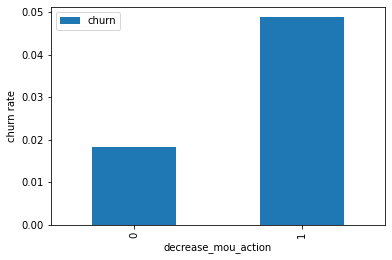

In [602]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

#### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

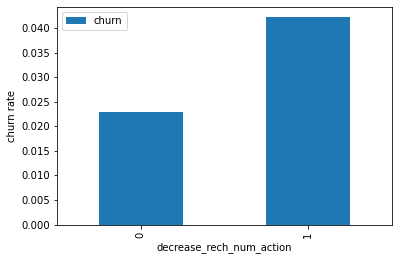

In [603]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

#### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

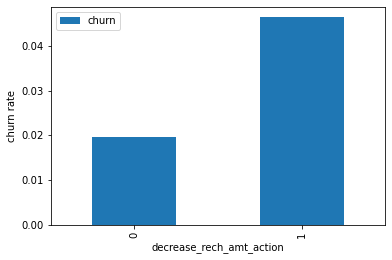

In [604]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

#### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

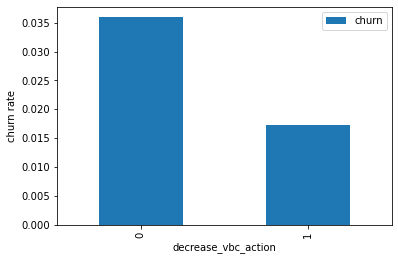

In [605]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

#### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [606]:
# Creating churn dataframe

data_churn = data[data['churn'] == 1]

# Creating not churn dataframe

data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

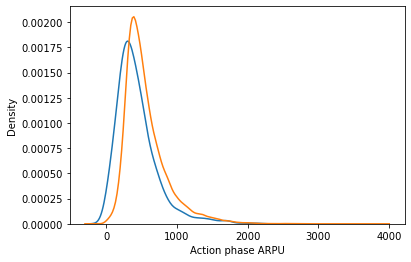

In [607]:
# Distribution plot

ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

#### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

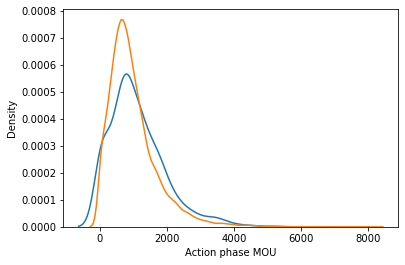

In [608]:
# Distribution plot

ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

## Bivariate analysis

#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

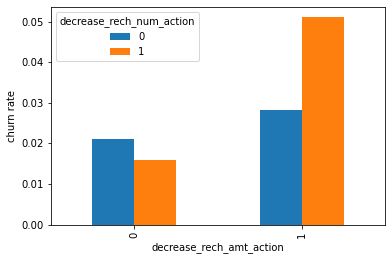

In [609]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

#### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

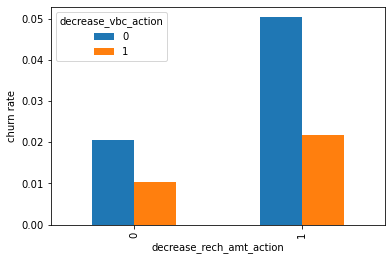

In [610]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Analysis of recharge amount and number of recharge in action month

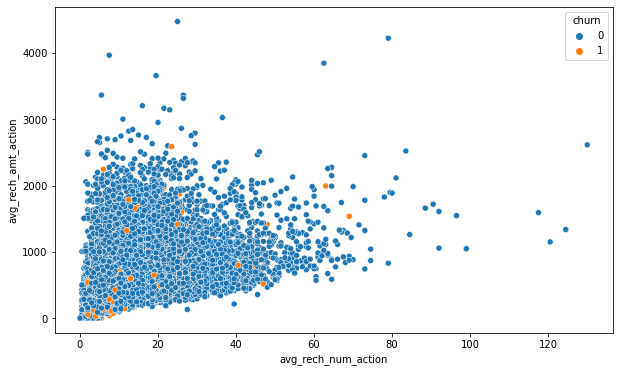

In [611]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

Above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [612]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [613]:
# Let Import library.

from sklearn.model_selection import train_test_split

In [614]:
X = data.drop(['churn'], axis=1) # Predictor variables
y = data.pop('churn') # Predicted / Target Variable

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

In [616]:
# Imporing SMOTE
! pip install imbalanced-learn 
from imblearn.over_sampling import SMOTE

In [617]:
# Instantiate SMOTE

smt = SMOTE(random_state=27)

In [618]:
# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,616.869,395.590,315.870,436.71,24.69,38.48,340.59,121.46,421.48,0.00,28.21,7.28,0.00,0.0,2.13,20.16,5.06,9.16,216.91,87.44,26.88,0.31,0.00,0.00,0.00,0.00,0.00,237.39,92.51,36.04,416.54,19.63,29.31,123.36,34.01,387.84,0.0,0.0,0.00,0.0,0.0,0.0,539.91,53.64,417.16,0.0,0.0,0.00,0.00,0.00,4.61,0.0,0.0,0.0,777.31,146.16,457.83,26.71,15.79,11.16,51.38,64.58,17.03,0.00,0.00,3.58,78.09,80.38,31.78,3.24,3.23,14.38,16.34,58.63,11.53,0.00,0.00,0.00,0.0,0.0,0.0,19.59,61.86,25.91,97.69,142.24,57.69,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14,8,11,699,381,367,154,154,130,154,0,0,35.36,210.80,424.50,479.42,888.48,4.87,1,1,0,6,4,4,0,0,0,0,0,0,796,5.65,0.00,104.88,1,1,1,1,1
1,0.0,0.0,0.0,137.752,1903.551,1555.414,55.08,236.09,222.04,75.66,1639.78,1426.99,0.00,0.00,0.00,0.00,0.0,0.00,31.58,118.81,86.89,27.43,326.43,153.78,0.00,0.00,0.00,0.00,0.00,0.00,59.01,445.24,240.68,23.49,117.28,135.14,48.23,1313.34,1273.21,0.0,0.0,0.00,0.0,0.0,0.0,71.73,1430.63,1408.36,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,130.74,1875.88,1649.04,1.26,74.69,59.66,33.91,240.03,138.53,0.00,0.00,0.00,35.18,314.73,198.19,0.00,0.00,4.03,0.51,36.89,18.38,0.00,0.00,0.00,0.0,0.0,0.0,0.51,36.89,22.41,35.69,351.63,220.61,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,47,32,180,2197,1886,50,100,119,50,50,61,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,428,0.00,0.00,0.00,0,0,0,0,0
2,0.0,0.0,0.0,505.791,720.279,696.945,83.64,55.93,92.09,269.21,188.93,277.64,0.00,0.00,0.00,0.00,0.0,0.00,83.06,47.18,92.09,239.23,170.16,267.99,27.91,11.71,1.73,0.00,0.00,0.00,350.21,229.06,361.83,0.58,8.74,0.00,2.06,3.33,0.00,0.0,0.0,0.45,0.0,0.0,0.0,2.64,12.08,0.45,0.0,0.5,0.00,0.00,3.21,7.46,0.0,0.0,0.0,352.86,244.86,369.74,42.79,39.41,63.69,153.74,140.29,188.59,17.53,5.73,14.13,214.08,185.44,266.43,0.00,0.00,0.00,0.00,7.73,3.28,0.00,0.00,0.01,0.0,0.0,0.0,0.00,7.73,3.29,215.01,196.03,269.73,0.0,0.00,0.0,0.93,2.85,0.00,0.00,0.00,0.00,6,9,7,642,928,794,152,154,152,120,130,130,39.13,45.60,6

### Feature Scaling


In [619]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [620]:
# Instantiate the Scaler
scaler = StandardScaler()

In [621]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [622]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [623]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001984814,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,-0.662893,0.076469,-0.226857,0.205784,-0.080821,-0.262731,-0.231835,-0.199342,-0.322715,-0.372360,-0.354566,0.151967,-0.420117,-0.642896,-0.323654,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.126098,-0.533371,-0.658333,0.613923,-0.439814,-0.371548,-0.185381,-0.424027,0.497949,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,0.289420,-0.592755,0.091351,-0.095491,-0.105549,-0.083560,-0.333192,-0.333239,-0.110669,-0.307087,-0.021261,-0.019099,0.178334,-0.878440,-0.282817,-0.266913,-0.331719,-0.361200,-0.505072,-0.458802,-0.658630,-0.348956,-0.341145,-0.267723,-0.546581,-0.550273,-0.689043,-0.161028,-0.154808,-0.015655,-0.155433,0.245509,-0.193470,-0.151088,-0.154416,-0.145034,0.0,0.0,0.0,-0.223572,0.054576,-0.171473,-0.595060,-0.488322,-0.695983,-0.32758,-0.091097,-0.253722,-0.159145,-0.165185,-0.160355,-0.095128,-0.122138,-0.106000,0.217883,-0.419014,0.044523,0.088303,-0.769872,-0.570923,-0.079749,-0.107353,-0.222292,0.423106,-0.813590,-0.745726,-0.158283,0.454756,1.244475,0.328358,0.848931,-0.329023,2.284614,2.178305,-0.328849,3.204652,1.773057,1.745129,-0.298681,-0.300081,-0.301197,-0.16188,-0.160519,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,1,1,1,1,1
7000665658,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,2.703900,2.265268,-0.226857,-0.174352,-0.177592,-0.262731,-0.231835,-0.222177,-0.273693,0.081994,-0.016667,-0.649268,0.616324,-0.090497,-0.338403,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.614628,0.419754,-0.087647,-0.418751,-0.197208,-0.103563,-0.383541,2.679038,2.668757,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,-0.550271,1.713768,1.751601,-0.095491,-0.105549,-0.083560,-0.333192,-0.333239,-0.322875,-0.307087,-0.021261,-0.019099,-0.892633,1

### Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

In [624]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001255513,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,0.342453,1.895103,0.019810,-0.174352,-0.177592,0.520481,-0.231835,-0.222177,-0.334519,-0.349792,-0.245889,-0.209155,-0.262736,-0.295046,-0.195189,-0.340270,-0.332085,0.060650,-0.211338,-0.248213,-0.360120,-0.420070,-0.365739,-0.469038,-0.488583,-0.445767,0.617438,0.545049,2.325447,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,0.096043,0.043595,1.290694,-0.095491,-0.105549,-0.08356,0.961014,0.702674,0.491423,0.277486,-0.021261,-0.019099,-0.102091,-0.180668,0.990936,-0.381893,-0.203679,0.031197,-0.132443,-0.332588,0.101421,-0.348956,-0.341145,-0.300474,-0.345776,-0.393827,0.044328,-0.201883,-0.191149,-0.211830,0.074310,-0.199548,-0.232537,-0.151088,-0.154416,-0.145034,0.0,0.0,0.0,-0.082033,-0.271250,-0.303617,-0.365356,-0.421554,-0.114210,-0.32758,-0.091097,-0.253722,-0.159145,0.158481,-0.160355,-0.095128,-0.122138,-0.106000,-0.105347,0.216583,0.897048,0.131441,-0.290803,0.441510,-0.079749,-0.275094,-0.222292,0.071230,0.184772,-0.514261,2.663370,1.615419,-0.174947,-0.324930,-0.178911,0.236482,2.284614,-0.348515,-0.328849,0.284769,1.773057,1.745129,-0.298681,-0.300081,-0.301197,1.03250,0.914001,1.820414,0.003445,-0.133609,0.020306,-0.317058,0,0,1,1,0
7000837056,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,-0.600361,-0.443135,0.159624,-0.174352,-0.177592,0.011124,-0.231835,-0.222177,-0.334648,-0.365370,-0.296837,-0.468284,-0.430786,-0.559971,-0.327460,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.535671,-0.535317,-0.568145,-0.480467,-0.488583,-0.441893,-0.056616,-0.349636,-0.117788,-0.163033,-0.158166,-0.146841,0.0,0.0,0.0,-0.370111,-0.574262,-0.375602,-0.095491,-0.105549,-0.08356,-0.314344,-0.333239,-0.322875,-0.307087,-0.021261,-0.019099,-0.677933,-0.862246,-0

## Model with PCA


In [625]:
#Import PCA
from sklearn.decomposition import PCA

In [626]:
# Instantiate PCA
pca = PCA(random_state=42)

In [627]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [628]:
# Principal components
pca.components_

array([[-3.20564485e-19,  1.11022302e-16, -0.00000000e+00, ...,
        -1.07346345e-02, -9.68482451e-03,  9.99904011e-03],
       [-1.60714422e-19,  0.00000000e+00, -1.66533454e-16, ...,
        -1.37579722e-02, -1.22852355e-02, -1.69648792e-02],
       [ 7.02496386e-20, -1.24900090e-16,  4.85722573e-17, ...,
        -1.95381254e-02, -1.87159439e-02,  3.51135542e-02],
       ...,
       [ 0.00000000e+00, -7.09946613e-02,  8.70675282e-02, ...,
         6.93889390e-17,  1.73472348e-18, -3.98986399e-17],
       [ 0.00000000e+00, -6.59517545e-03,  1.44650065e-02, ...,
         7.65446734e-17,  7.58941521e-18, -3.20923843e-17],
       [ 9.99996658e-01, -2.47687677e-03,  5.97910388e-04, ...,
         2.98155597e-19,  3.25260652e-19, -1.46909394e-17]])

In [629]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09825349 0.18709261 0.24088761 0.2883275  0.32798442 0.36609355
 0.39444897 0.42237794 0.44850192 0.47371472 0.49752572 0.52059546
 0.54229743 0.56350921 0.58315905 0.6016858  0.61813022 0.63293898
 0.64736378 0.66156044 0.67520537 0.68765645 0.69984057 0.71093521
 0.72160536 0.73180318 0.74173576 0.75139276 0.76048501 0.76889371
 0.7768848  0.78462758 0.79205887 0.79918754 0.80590777 0.81247571
 0.81896067 0.82534164 0.83161288 0.83770289 0.84376501 0.84959825
 0.85517748 0.86061454 0.86584275 0.87089985 0.8757824  0.88025793
 0.88457894 0.88878312 0.89283235 0.89670077 0.9005251  0.90424925
 0.90796057 0.91152051 0.91494825 0.91825106 0.92144558 0.92451668
 0.92747602 0.93038039 0.93322992 0.93604145 0.93880554 0.94154835
 0.94425275 0.94692886 0.94944619 0.95193451 0.95436333 0.95672582
 0.95904642 0.961167   0.96322525 0.96522079 0.96717096 0.96910572
 0.97096924 0.97282327 0.97464388 0.97641079 0.97813494 0.97981207
 0.9814719  0.98307596 0.98466282 0.98615641 0.98753979 0.9888

Text(0, 0.5, 'Cumulative Variance')

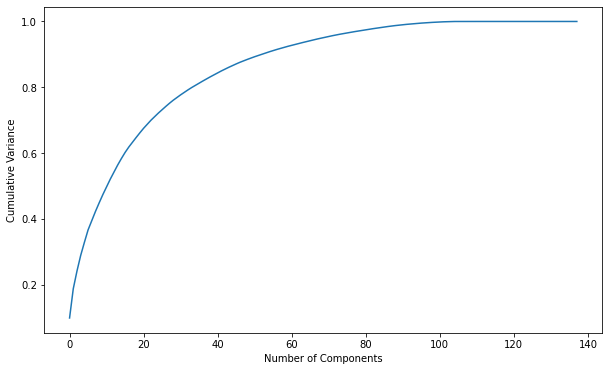

In [630]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see from above plot 60 components explain almost more than 90% variance of the data. So, we will perform PCA with 60 components.

### Performing PCA with 60 components


In [631]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [632]:
# Instantiate PCA with 60 components

pca_final = IncrementalPCA(n_components=60)

In [633]:
# Fit and transform the X_train

X_train_pca = pca_final.fit_transform(X_train)

### Lets apply Transformation on Test set

In [634]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA


In [635]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [636]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning hyperparameter C

In [637]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [638]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [639]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064705,0.016445,0.002209,0.000658,0.01,{'C': 0.01},0.035971,0.048780,0.055172,0.020690,0.027397,0.037602,0.012857,6,0.043333,0.043478,0.043771,0.042088,0.038786,0.042291,0.001845
1,0.107467,0.017778,0.001568,0.000228,0.1,{'C': 0.1},0.064748,0.060976,0.062069,0.048276,0.034247,0.054063,0.011421,5,0.070000,0.069565,0.079125,0.060606,0.060708,0.068001,0.006900
2,0.144029,0.014257,0.001890,0.000732,1,{'C': 1},0.064748,0.060976,0.068966,0.068966,0.041096,0.060950,0.010364,4,0.083333,0.078261,0.085859,0.067340,0.069140,0.076787,0.007417
3,0.110539,0.011437,0.001318,0.000023,10,{'C': 10},0.064748,0.067073,0.068966,0.068966,0.047945,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
4,0.149978,0.033772,0.001384,0.000054,100,{'C': 100},0.064748,0.067073,0.068966,0.068966,0.047945,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
5,0.107184,0.022243,0.001347,0.000039,1000,{'C': 1000},0.064748,0.067073,0.068966,0.068966,0.047945,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595


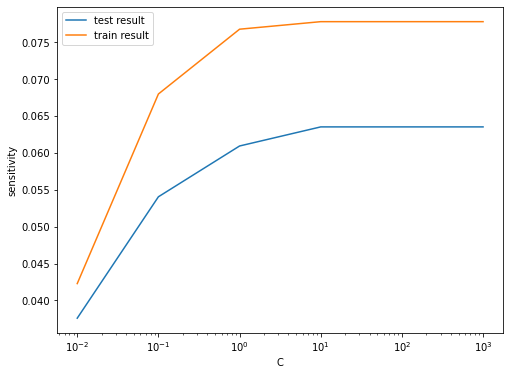

In [640]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [641]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.06353952242655339 at C = 10


### Logistic regression with optimal C


In [642]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [643]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set


In [644]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [645]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21374    51]
 [  686    53]]


In [646]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [647]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

Accuracy:- 0.97
Sensitivity:- 0.07
Specificity:- 1.0


### Prediction on the test set


In [648]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [649]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5335   13]
 [ 176   17]]


In [650]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [651]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-",round(TN / float(TN+FP),2))

Accuracy:- 0.97
Sensitivity:- 0.09
Specificity:- 1.0


### Model Summary

#### Train set
<p>
    <li>Accuracy = 0.97</li>
    <li>Sensitivity = 0.09</li>
    <li>Specificity = 1.0</li>
</p>

#### Test set
<p>
<li>Accuracy = 0.97</li>
<li>Sensitivity = 0.09</li>
<li>Specificity = 1.0</li> </p>

Model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA


In [652]:
# Importing SVC
from sklearn.svm import SVC

### Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [653]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [654]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.834189,0.259487,2.844115,0.531939,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966838,0.966838,0.000000,1,0.967380,0.967989,0.967989,0.967786,0.000287
1,2.363849,0.337935,1.395485,0.092672,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,1.467370,0.048940,1.260926,0.015569,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,3.058116,0.031583,2.067930,0.045903,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966567,0.965620,0.965620,0.965936,0.000447,9,0.977260,0.977599,0.977599,0.977486,0.000160
4,2.861067,0.743310,1.639608,0.231765,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966432,0.966613,0.000169,4,0.967244,0.967244,0.967447,0.967312,0.000096
5,2.947335,0.262289,1.522879,0.152887,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,4,0.966635,0.966635,0.966770,0.966680,0.000064
6,3.042016,0.090365,1.962451,0.410568,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959800,0.957228,0.958311,0.958446,0.001054,11,0.990187,0.990322,0.990525,0.990345,0.000139
7,3.399751,0.265594,1.813417,0.421983,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966161,0.967109,0.965620,0.966297,0.000615,8,0.969545,0.970425,0.970357,0.970109,0.000400
8,3.392520,0.573494,1.337500,0.112030,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,6,0.966635,0.966770,0.966906,0.966770,0.000111
9,3.806411,0.407192,1.516606,0.044066,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946400,0.947618,0.948836,0.947618,0.000995,12,0.999053,0.998308,0.998646,0.998669,0.000304


### Plotting the accuracy with various C and gamma values


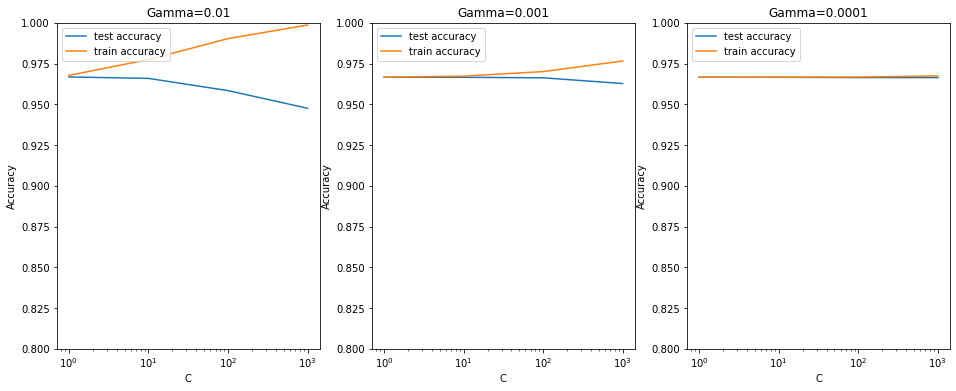

In [655]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [656]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9668381158635625 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


## Build the model with optimal hyperparameters


In [657]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

### Prediction on the train set

In [658]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [659]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  737     2]]


In [660]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [661]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.0027063599458728013
Specificity:- 1.0


### Prediction on the test set

In [662]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [663]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [664]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [665]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


### Model Summary

#### Train set
<p>
    <li>Accuracy = 0.97</li>
    <li>Sensitivity = 0.00</li>
    <li>Specificity = 1.0</li>
</p>

#### Test set
<p>
<li>Accuracy = 0.96</li>
<li>Sensitivity = 0.0</li>
<li>Specificity = 1.0</li> </p>

## Decision tree with PCA


In [666]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter tuning

In [667]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [668]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.483407,0.017551,0.001895,0.000413,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.141892,0.040541,0.061224,0.059542,0.046305,3
1,0.703392,0.401247,0.002878,0.001882,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.141892,0.040541,0.061224,0.059542,0.046305,3
2,0.478187,0.014870,0.001701,0.000288,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
3,0.480088,0.020559,0.001631,0.000273,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
4,0.847795,0.026909,0.001797,0.000241,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.054054,0.081081,0.155405,0.047297,0.061224,0.079812,0.039452,1
5,0.826646,0.018043,0.001643,0.000126,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.054054,0.081081,0.155405,0.047297,0.061224,0.079812,0.039452,1
6,0.800867,0.031578,0.001935,0.000366,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
7,0.902430,0.120638,0.002198,0.000404,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5


In [669]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.07981246552675125
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with optimal hyperparameters


In [670]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train set


In [671]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [672]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21324   101]
 [  606   133]]


In [673]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [674]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9681014257354268
Sensitivity:- 0.17997293640054127
Specificity:- 0.9952858809801634


### Prediction on the test set


In [675]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [676]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5314   34]
 [ 175   18]]


In [677]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [678]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9622811766829092
Sensitivity:- 0.09326424870466321
Specificity:- 0.993642483171279


### Model Summary

#### Train set
<p>
    <li>Accuracy = 0.97</li>
    <li>Sensitivity = 0.00</li>
    <li>Specificity = 1.0</li>
</p>

#### Test set
<p>
<li>Accuracy = 0.96</li>
<li>Sensitivity = 0.0</li>
<li>Specificity = 1.0</li> </p>

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random forest with PCA


In [679]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning


In [680]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [681]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9666576430247248 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


### Model with optimal hyperparameters


In [682]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [683]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

### Prediction on the train set


In [684]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [685]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  739     0]]


In [686]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [687]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666576430247248
Sensitivity:- 0.0
Specificity:- 1.0


### Prediction on the test set


In [688]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [689]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [690]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [691]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


### Model Summary

#### Train set
<p>
    <li>Accuracy = 0.97</li>
    <li>Sensitivity = 0.00</li>
    <li>Specificity = 1.0</li>
</p>

#### Test set
<p>
<li>Accuracy = 0.96</li>
<li>Sensitivity = 0.0</li>
<li>Specificity = 1.0</li> </p>

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

##Final conclusion with PCA

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

## Without PCA

## Logistic regression with No PCA



In [692]:
# Importing stats model
import statsmodels.api as sm

In [693]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [694]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [695]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22034
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 13 Jan 2023   Deviance:                       4067.2
Time:                        20:25:06   Pearson chi2:                 2.41e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -98.2298   8543.780     -0.011      0.991   -1.68e+04    1.66e+04
loc_og_t2o_mou           -1.798e-06      0.000     -0.013      0.990      -0.000       0.000
std_og_t2o_mou            2.146e-06      0.000      0.011      0.991      -0.000       0.000
loc_ic_t2o_mou            1.083e-06      0.000      0.009      0.993      -0.000       0.000
arpu_6                      -0.1052      0.160     -0.659      0.510      -0.418       0.208
arpu_7                       0.0732      0.175      0.419      0.675      -0.269       0.416
arpu_8                       0.1075      0.231      0.465      0.642      -0.346       0.561
onnet_mou_6                  5.6447      6.274      0.900      0.368      -6.652      17.942
onnet_mou_7                  2.2474      3.788      0.593      0.553      -5.177       9.672
onnet_mou_8                 -4.0263      4.519     -0.891      0.373     -12.882       4.830
offnet_mou_6                 5.9594      6.210      0.960      0.337      -6.211      18.130
offnet_mou_7                 2.8726      3.693      0.778      0.437      -4.366      10.111
offnet_mou_8                -5.1067      4.627     -1.104      0.270     -14.176       3.963
roam_ic_mou_6                0.0753      0.041      1.820      0.069      -0.006       0.156
roam_ic_mou_7               -0.0277      0.047     -0.594      0.552      -0.119       0.064
roam_ic_mou_8                0.0377      0.039      0.973      0.331      -0.038       0.114
roam_og_mou_6               -1.3477      1.512     -0.891      0.373      -4.312       1.616
roam_og_mou_7               -0.3995      0.714     -0.559      0.576      -1.799       1.000
roam_og_mou_8                0.9550      0.938      1.018      0.309      -0.884       2.794
loc_og_t2t_mou_6         -1931.5501   1905.584     -1.014      0.311   -5666.425    1803.325
loc_og_t2t_mou_7          -314.9443   2037.927     -0.155      0.877   -4309.209    3679.320
loc_og_t2t_mou_8          4897.2878   2219.013      2.207      0.027     548.101    9246.474
loc_og_t2m_mou_6         -1961.3809   1934.421     -1.014      0.311   -5752.777    1830.015
loc_og_t2m_mou_7          -290.6013   1877.012     -0.155      0.877   -3969.478    3388.275
loc_og_t2m_mou_8          4890.8574   2215.995      2.207      0.027     547.588    9234.127
loc_og_t2f_mou_6          -174.2900    171.937     -1.014      0.311    -511.281     162.701
loc_og_t2f_mou_7           -27.0533    174.501     -0.155      0.877    -369.068     314.962
loc_og_t2f_mou_8           436.0564    197.769      2.205      0.027      48.437     823.676
loc_og_t2c_mou_6             0.0254      0.042      0.607      0.544      -0.057       0.107
loc_og_t2c_mou_7             0.0229      0.047      0.485      0.627      -0.070       0.115
loc_og_t2c_mou

### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE


In [696]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns


In [697]:
# Importing RFE

from sklearn.feature_selection import RFE

In [698]:
# Intantiate RFE with 15 columns

rfe = RFE(logreg,n_features_to_select=15)

# Fit the rfe model with train set

rfe = rfe.fit(X_train, y_train)

In [699]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8'],
      dtype='object')


### Model-1 with RFE selected columns


In [700]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22148
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 13 Jan 2023   Deviance:                       4548.5
Time:                        20:25:27   Pearson chi2:                 2.25e+06
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -89.8874   8158.421     -0.011      0.991   -1.61e+04    1.59e+04
offnet_mou_7         1.2601      0.173      7.277      0.000       0.921       1.599
loc_og_t2m_mou_7    -0.7593      0.142     -5.342      0.000      -1.038      -0.481
loc_og_t2f_mou_8    -1.0922      0.363     -3.011      0.003      -1.803      -0.381
loc_og_mou_8        -0.9819      0.281     -3.499      0.000      -1.532      -0.432
std_og_t2m_mou_7    -0.9070      0.161     -5.630      0.000      -1.223      -0.591
isd_og_mou_8        -1.6307      1.082     -1.507      0.132      -3.752       0.491
og_others_8      -4345.7126   4.27e+05     -0.010      0.992   -8.42e+05    8.33e+05
total_og_mou_8      -0.6784      0.073     -9.354      0.000      -0.821      -0.536
loc_ic_t2m_mou_8    -0.9032      0.607     -1.487      0.137      -2.094       0.287
loc_ic_t2f_mou_8    -0.9618      0.426     -2.256      0.024      -1.797      -0.126
loc_ic_mou_8        -1.3289      0.737     -1.803      0.071      -2.773       0.116
total_ic_mou_8      -1.1255      0.338     -3.334      0.001      -1.787      -0.464
spl_ic_mou_8        -0.6606      0.134     -4.925      0.000      -0.923      -0.398
ic_others_8         -1.4216      0.602     -2.363      0.018      -2.601      -0.242
vol_3g_mb_8         -1.3204      0.188     -7.011      0.000      -1.690      -0.951
====================================================================================
"""

### VIFs Model-1


In [701]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [702]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
10,loc_ic_mou_8,8.21
11,total_ic_mou_8,5.29
8,loc_ic_t2m_mou_8,3.82
3,loc_og_mou_8,2.49
7,total_og_mou_8,1.86
9,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


In [703]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8']


## Model-2

In [704]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22149
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2277.4
Date:                Fri, 13 Jan 2023   Deviance:                       4554.7
Time:                        20:25:28   Pearson chi2:                 2.28e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8995      0.216    -32.008      0.000      -7.322      -6.477
offnet_mou_7         1.2641      0.173      7.300      0.000       0.925       1.603
loc_og_t2m_mou_7    -0.7583      0.142     -5.338      0.000      -1.037      -0.480
loc_og_t2f_mou_8    -1.0918      0.363     -3.007      0.003      -1.803      -0.380
loc_og_mou_8        -0.9855      0.281     -3.508      0.000      -1.536      -0.435
std_og_t2m_mou_7    -0.9110      0.161     -5.655      0.000      -1.227      -0.595
isd_og_mou_8        -1.6705      1.073     -1.557      0.119      -3.773       0.432
total_og_mou_8      -0.6796      0.073     -9.365      0.000      -0.822      -0.537
loc_ic_t2m_mou_8    -0.9015      0.608     -1.484      0.138      -2.092       0.289
loc_ic_t2f_mou_8    -0.9665      0.427     -2.264      0.024      -1.803      -0.130
loc_ic_mou_8        -1.3297      0.738     -1.803      0.071      -2.775       0.116
total_ic_mou_8      -1.1259      0.338     -3.331      0.001      -1.788      -0.463
spl_ic_mou_8        -0.6613      0.134     -4.939      0.000      -0.924      -0.399
ic_others_8         -1.4190      0.602     -2.358      0.018      -2.598      -0.240
vol_3g_mb_8         -1.3187      0.188     -7.003      0.000      -1.688      -0.950
====================================================================================
"""

### VIF for Model-2


In [705]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
9,loc_ic_mou_8,8.20
10,total_ic_mou_8,5.29
7,loc_ic_t2m_mou_8,3.81
3,loc_og_mou_8,2.49
6,total_og_mou_8,1.86
8,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


In [706]:
# Removing offnet_mou_7 column
log_cols.remove('offnet_mou_7')

## Model-3

In [707]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22150
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2303.6
Date:                Fri, 13 Jan 2023   Deviance:                       4607.1
Time:                        20:25:28   Pearson chi2:                 3.23e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.9923      0.219    -31.987      0.000      -7.421      -6.564
loc_og_t2m_mou_7    -0.1389      0.117     -1.192      0.233      -0.367       0.090
loc_og_t2f_mou_8    -1.0492      0.361     -2.908      0.004      -1.756      -0.342
loc_og_mou_8        -0.9368      0.278     -3.371      0.001      -1.481      -0.392
std_og_t2m_mou_7     0.2394      0.036      6.612      0.000       0.168       0.310
isd_og_mou_8        -1.7096      1.113     -1.536      0.125      -3.891       0.472
total_og_mou_8      -0.7257      0.073     -9.957      0.000      -0.868      -0.583
loc_ic_t2m_mou_8    -0.9617      0.615     -1.563      0.118      -2.167       0.244
loc_ic_t2f_mou_8    -0.9966      0.432     -2.309      0.021      -1.843      -0.150
loc_ic_mou_8        -1.5123      0.741     -2.041      0.041      -2.965      -0.060
total_ic_mou_8      -1.0594      0.332     -3.191      0.001      -1.710      -0.409
spl_ic_mou_8        -0.6711      0.134     -5.009      0.000      -0.934      -0.409
ic_others_8         -1.4600      0.604     -2.416      0.016      -2.645      -0.275
vol_3g_mb_8         -1.3327      0.189     -7.055      0.000      -1.703      -0.962
====================================================================================
"""

### VIF Model-3


In [708]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,8.19
9,total_ic_mou_8,5.29
6,loc_ic_t2m_mou_8,3.81
2,loc_og_mou_8,2.49
0,loc_og_t2m_mou_7,1.86
5,total_og_mou_8,1.86
3,std_og_t2m_mou_7,1.54
7,loc_ic_t2f_mou_8,1.28
1,loc_og_t2f_mou_8,1.16
11,ic_others_8,1.04


In [709]:
# Removing loc_ic_mou_8 column
log_cols.remove('loc_ic_mou_8')

## Model-4

In [710]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22151
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2305.8
Date:                Fri, 13 Jan 2023   Deviance:                       4611.7
Time:                        20:25:28   Pearson chi2:                 2.77e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.9486      0.216    -32.171      0.000      -7.372      -6.525
loc_og_t2m_mou_7    -0.1228      0.116     -1.061      0.289      -0.350       0.104
loc_og_t2f_mou_8    -1.0088      0.358     -2.819      0.005      -1.710      -0.307
loc_og_mou_8        -1.0887      0.273     -3.984      0.000      -1.624      -0.553
std_og_t2m_mou_7     0.2415      0.036      6.683      0.000       0.171       0.312
isd_og_mou_8        -1.6607      1.095     -1.516      0.129      -3.807       0.486
total_og_mou_8      -0.7189      0.073     -9.903      0.000      -0.861      -0.577
loc_ic_t2m_mou_8    -1.8793      0.394     -4.773      0.000      -2.651      -1.108
loc_ic_t2f_mou_8    -1.1967      0.421     -2.839      0.005      -2.023      -0.371
total_ic_mou_8      -1.4399      0.313     -4.595      0.000      -2.054      -0.826
spl_ic_mou_8        -0.6684      0.134     -4.998      0.000      -0.931      -0.406
ic_others_8         -1.4402      0.605     -2.382      0.017      -2.625      -0.255
vol_3g_mb_8         -1.3344      0.189     -7.064      0.000      -1.705      -0.964
====================================================================================
"""

### VIF Model-4


In [711]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_t2m_mou_8,2.68
8,total_ic_mou_8,2.67
2,loc_og_mou_8,2.41
0,loc_og_t2m_mou_7,1.85
5,total_og_mou_8,1.85
3,std_og_t2m_mou_7,1.54
7,loc_ic_t2f_mou_8,1.23
1,loc_og_t2f_mou_8,1.16
10,ic_others_8,1.03
9,spl_ic_mou_8,1.02


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-4 log_no_pca_4 will be the final model.

## Model performance on the train set


In [712]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

mobile_number
7001984814    9.245776e-02
7000665658    5.626863e-03
7001136926    3.910397e-04
7002096807    9.237892e-04
7002365033    1.170135e-16
dtype: float64

### Creating a dataframe with the actual churn and the predicted probabilities


In [713]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,9.245776e-02,0
1,0,5.626863e-03,1
2,0,3.910397e-04,2
3,0,9.237892e-04,3
4,0,1.170135e-16,4


### Finding Optimal Probablity Cutoff Point


In [714]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,9.245776e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,5.626863e-03,1,1,0,0,0,0,0,0,0,0,0
2,0,3.910397e-04,2,1,0,0,0,0,0,0,0,0,0
3,0,9.237892e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,1.170135e-16,4,1,0,0,0,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.


In [715]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.033342     1.000000     0.000000
0.1          0.1  0.903221     0.710419     0.909872
0.2          0.2  0.955649     0.562923     0.969195
0.3          0.3  0.965485     0.064953     0.996546
0.4          0.4  0.966477     0.013532     0.999347
0.5          0.5  0.966613     0.005413     0.999767
0.6          0.6  0.966658     0.002706     0.999907
0.7          0.7  0.966613     0.000000     0.999953
0.8          0.8  0.966658     0.000000     1.000000
0.9          0.9  0.966658     0.000000     1.000000


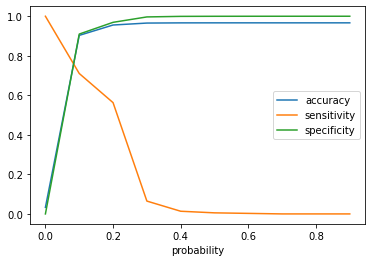

In [716]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [717]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,9.245776e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.626863e-03,1,1,0,0,0,0,0,0,0,0,0,0
2,0,3.910397e-04,2,1,0,0,0,0,0,0,0,0,0,0
3,0,9.237892e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,1.170135e-16,4,1,0,0,0,0,0,0,0,0,0,0


### Metrics


In [718]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[21420     5]
 [  735     4]]


In [719]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [720]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666125248150154
Sensitivity:- 0.005412719891745603
Specificity:- 0.9997666277712952


### Plotting the ROC Curve (Trade off between sensitivity & specificity)


In [721]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

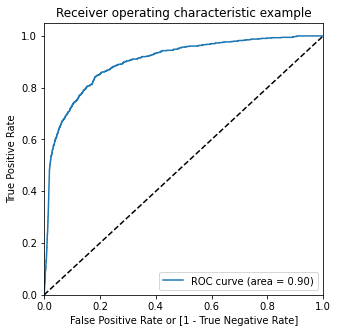

In [722]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

## Testing the model on the test set


In [723]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [724]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [725]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

### Predictions on the test set with final model


In [726]:
# Predict on the test set
y_test_pred = log_no_pca_4.predict(X_test_sm)

In [727]:
y_test_pred.head()

mobile_number
7001255513    0.001861
7000837056    0.004606
7001604575    0.000332
7001405686    0.001641
7001975804    0.000359
dtype: float64

In [728]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
mobile_number,
7001255513,0.001861
7000837056,0.004606
7001604575,0.000332
7001405686,0.001641
7001975804,0.000359


In [729]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
mobile_number,
7001255513,0
7000837056,0
7001604575,0
7001405686,0
7001975804,0


In [730]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [731]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [732]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [733]:
y_test_pred_final.head()

,churn,CustID,0
0,0,7001255513,0.001861
1,0,7000837056,0.004606
2,0,7001604575,0.000332
3,0,7001405686,0.001641
4,0,7001975804,0.000359


In [734]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [735]:
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,7001255513,0.001861
1,0,7000837056,0.004606
2,0,7001604575,0.000332
3,0,7001405686,0.001641
4,0,7001975804,0.000359


In [736]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)


In [737]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,7001255513,0.001861,0
1,0,7000837056,0.004606,0
2,0,7001604575,0.000332,0
3,0,7001405686,0.001641,0
4,0,7001975804,0.000359,0


### Metrics


In [738]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[5347    1]
 [ 191    2]]


In [739]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [740]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9653492149431511
Sensitivity:- 0.010362694300518135
Specificity:- 0.99981301421092
